
# ¿Por qué no ser tacaños? Análisis ecológico de estrategias en el *ultimatum game* iterado

## 0 - Introducción

El *ultimatum game* es un juego asimétrico de dos agentes. El **oferente** tiene a su disposición una suma de dinero $X$, de la cual le ofrece un porcentaje a un **receptor**. Si el receptor acepta la propuesta, recibe el porcentaje de $X$ propuesto por el oferente, y el oferente se queda con el porcentaje restante. Si el receptor rechaza la oferta, ninguno de los dos participantes recibe nada.

El único **equilibrio de Nash** de subjuegos perfectos en el *ultimatum game* es que el oferente ofrezca una suma infinitesimal de dinero al receptor, y que el receptor acepte la oferta (Schuster, 2017). Sin embargo, las personas no suelen adoptar la estrategia óptima de Nash en contextos experimentales. Por ejemplo, la oferta mediana en la mayoría de los estudios experimentales es del 50%, la oferta media ronda el 40%, y los receptores suelen rechazar ofertas menores al 50% frecuentemente (Brosnan, 2009).

En este trabajo, usamos modelos de múltiples agentes con comportamientos adaptativos para postular una hipótesis de por qué emerge la disociación entre el comportamiento práctico de las personas y la estrategia asociada equilibrio de Nash de subjuegos perfectos (desde ahora, "estrategia tacaña"). Para ello, estudiaremos el rendimiento de distintas estrategias para el *ultimatum game* iterado desde dos enfoques de modelado:

- El primero es el **enfoque ecológico**, propuesto por Axelrod, para estudiar el dilema del prisionero iterado (Axelrod, 1983).
- El segundo es un **enfoque genético**, que permite estudiar la evolución automática de estrategias representadas por redes neuronales (Stanley, 2002). Para facilitar la lectura, expondremos y justificaremos los enfoques utilizados en las secciones correspondientes.

La primera sección muestra que, aunque a veces las estrategias convenientes en un juego iterado difieren de los equilibrios de Nash estables para una sola ronda del mismo juego, la estrategia tacaña es exitosa en experimentos ecológicos del *ultimatum game* iterado. Además, cuando toda la población de agentes implementa la estrategia tacaña, el *payoff* medio de la población total es el máximo posible.

La segunda sección muestra la emergencia de la estrategia tacaña por evolución automática mediante un algoritmo genético. Argumentaremos que este resultado es esperable por cuatro motivos, destacandose esta estrategia por su simplicidad, consistencia, optimización social y robustez, haciendonos preguntar por que las personas no implementan la estrategia tacaña en los experimentos.

La tercera sección funciona como transición para formular nuestra hipótesis. Esta sección presenta una estrategia *ad-hoc* diseñada para desplazar a la estrategia tacaña, a la que denominamos "estrategia antitacaña". La estrategia antitacaña supera a la estrategia tacaña en la ecología de estrategias cuando es implementada por más del 30% de la población, con el 70% restante implementando la estrategia tacaña. Por un lado, esto demuestra que existen contextos de poblaciones de estrategias en que la estrategia tacaña deja de ser óptima. Por otro lado, como lo argumentaremos, la estrategia antitacaña diseñada es óptima para desplazar poblaciones de la estrategia tacaña, lo cual pone en evidencia la gran robustez de la estrategia tacaña: hace falta que al menos un 30% de la población implemente una estrategia distinta para que sea desplazada, lo cual dificulta la emergencia de estrategias alternativas y genera un efecto *lock-in*.

La cuarta sección formula una hipótesis de por qué las personas implementan una estrategia distinta a la tacaña en la práctica, a pesar de que la estrategia tacaña 1) sea robusta y fácil de emerger evolutivamente, 2) implemente un equilibrio de Nash de subjuegos perfectos para el *ultimatum game*, y 3) tienda a alcanzar un *payoff* medio óptimo a medida que la implementa una mayor  cantidad de agentes. Para ello, nos basaremos en algunas observaciones de la psicología evolutiva y la economía conductual. 

En particular, la psicología evolutiva observa que las emociones de la gratitud y el enfado funcionan como heurísticas cognitivas para implementar la reciprocidad, que es robusta y exitosa en contextos de dilema del prisionero iterado (Axelrod, 1983; Bloom, 2008). Las heurísticas cognitivas, y en particular, las emociones, impactan en las decisiones económicas (Kahneman, 1974; Heilman, 2016). Particularmente, el rechazo a ofertas bajas en el ultimatum game suele asociarse a la emoción de fastidio (Sanfey et al., 2003, van’t Wout et al., 2006).

Considerando esta información, nuestra hipótesis es que las personas implementan heurística y emotivamente una estrategia similar a la reciprocidad en el *ultimatum game*, a la que denominamos "estrategia recíproca", y que el uso generalizado de la estrategia recíproca produce un equilibrio estable y robusto ante la presencia de estrategias tacañas, lo que dificulta la emergencia de la misma en la conducta empírica de las personas. 

Para corroborar la hipótesis, formulamos una versión de la reciprocidad adaptada para el *ultimatum game* iterado, a la que denominamos "estrategia recíproca". A continuación, mostramos experimentalmente que la estrategia recíproca es robusta ante la presencia de estrategias tacañas, es decir, que cuando más de la mitad de los agentes implementan la estrategia recíproca, es más conveniente seguir la estrategia recíproca que la estrategia tacaña en la ecología de estrategias. Además, mostramos que la estrategia recíproca también tiende a ser socialmente óptima a medida que más agentes la adoptan, en el sentido referido anteriormente. Para finalizar, mostramos una curiosidad: cuando tres de cada cuatro agentes implementan la estrategia recíproca y el agente restante implementa la estrategia tacaña, el comportamiento macroscópico emergente es que la mediana de ofertas es del 50%, la oferta media es del 40%, y los receptores suelen rechazar ofertas menores al 50% frecuentemente, reproduciendo fenómenos macroscópicos observados empíricamente.

## 1 - La estrategia tacaña en contextos ecológicos

### El equilibrio de Nash en el *ultimatum game* 

Al jugar una sola ronda del *ultimatum game*, el único equilibrio de Nash estable de subjuegos perfectos es que el oferente le ofrezca al receptor quedarse con una suma infinitesimal y que el receptor la acepte. 

Esto es así porque el receptor gana más dinero al aceptar cualquier oferta positiva que al no aceptarla, por infinitesimal que sea. En consecuencia, el comportamiento óptimo para el oferente es ofrecer porcentajes infinitesimales, porque el receptor aceptará cualquier oferta.

### De la acción a la estrategia

En juegos de una sola ronda de dos jugadores, cada agente decide qué **acción** o distribución de acciones ejecutar, a partir de las acciones que podría ejecutar el otro agente.

En los juegos iterados, cada agente considera las acciones que ejecutó el otro agente en el pasado, además de las acciones que podría ejecutar en cada encuentro. En este caso, se dice que los agentes implementan una **estrategia**. Una estrategia es una función que determina qué acción ejecutar a partir del **historial** de encuentros entre ambos agentes. 

Como las estrategias adaptan las acciones al historial de encuentros, las acciones de un agente en un encuentro pueden influir en las acciones de otros agentes en encuentros subsiguientes.

La adaptatividad de las acciones al historial implica que pueden existir estrategias exitosas en juegos iterados que implementen acciones diferentes a los equilibrios de Nash en los juegos correspondientes de una sola ronda. Un ejemplo paradigmático de esto es el dilema del prisionero iterado, en que la reciprocidad es exitosa y promueve la cooperación con otros agentes, mientras que el equilibrio de Nash estable en el dilema del prisionero es traicionar al coparticipante (Axelrod, 1983).

Esto es así porque, en los juegos iterados con decisiones adaptativas, los agentes pueden escoger una acción subóptima en un juego que incida en las decisiones de los otros agentes en juegos subsiguientes para mejorar sus propios *payoffs* en el largo plazo.

Para estudiar la emergencia de la reciprocidad en contextos de dilema del prisionero iterado, Axelrod propuso un enfoque denominado **ecología de estrategias**. La ecología de estrategias es un enfoque computacional de múltiples agentes que ayuda a identificar estrategias convenientes para juegos iterados a partir de poblaciones iniciales determinadas.

### La ecología de estrategias

La ecología de estrategias añade una segunda capa de adaptatividad a las estrategias. El enfoque ecológico determina cómo los agentes adaptan la estrategia que implementan según qué estrategias son más exitosas en un contexto poblacional determinado.

La ecología de estrategias se inicializa con un conjunto finito de estrategias $e_i$, asociados a las cantidades $n_i$ de agentes que empezarán implementando cada estrategia. En nuestra implementación, también toma la topología del grafo en que los agentes jugarán al juego, donde cada agente sólo jugará con sus vecinos en el grafo. 

Luego, el sistema evoluciona por **generaciones**. En cada generación, se actualiza la proporción de agentes $n_i$ de cada estrategia según el rendimiento de cada estrategia en la generación anterior, de la siguiente manera:

1. Repartir las estrategias aleatoriamente entre los agentes, asignando cada estrategia $e_i$ a $n_i$ agentes con probabilidad uniforme.
2. Durante $k$ turnos, elegir dos vecinos al azar para que jueguen al *ultimatum game*, siguiendo cada uno su estrategia. 
3. Calcular el fitness de cada agente. En nuestra implementacion, el fitness de cada agente es el *payoff* medio en los juegos en que participó.
4. Calcular el fitness $f_i$ de cada estrategia $e_i$, es decir, la suma de fitnesses de los agentes que implementaron $e_i$ sobre la suma de fitnesses de todos los agentes que jugaron. Así, el fitness de cada estrategia es la proporción ganados por la estrategia en la generación finalizada.
5. Actualizar $n_i$ para todas las estrategias. El nuevo valor será la proporción dada por $f_i$ del número de agentes que participan en el juego. De esta manera, la cantidad de agentes que usa la estrategia *e_i* en una generación está dada por la proporción de puntos que obtuvo la estrategia *e_i* en la generación anterior.

En nuestra implementación, el oferente tiene a su disposición 10 unidades de valor para repartir, y puede ofrecer al receptor cualquier cantidad entera entre 1 y 9 inclusive. 

El enfoque ecológico enriquece el análisis de estrategias. Si sólo se considerara el *fitness* de los agentes que usan cada estrategia para una distribución de estrategias determinada, se perderían efectos interesantes en la dinámica de las poblaciones.

Recordemos que el rendimiento de cada estrategia depende de la distribución de las estrategias restantes en la población. Esto implica que parte del impacto de una estrategia es mejorar o perjudicar la viabilidad de otras estrategias. Por este motivo, es importante considerar los cambios poblacionales a través de las generaciones. Por ejemplo, una estrategia puede tener un *fitness* bajo en una generación, pero disminuir el fitness de estrategias que le son perjudiciales o mejorar el fitness de estrategias que le son beneficiosas, lo cual incidiría en otras poblaciones y mejoraría su propio *fitness* en las generaciones futuras. Por otra parte, una estrategia puede tener un *fitness* alto en una generación, pero perjudicar a estrategias que le son beneficiosas o beneficiar a estrategias que le son perjudiciales, lo cual incidiría en otras poblaciones y disminuiría su propio *fitness* en las generaciones futuras.

En esta primera sección, evaluamos la estrategia tacaña en un contextos ecológicos con otras estrategias sencillas, y mostramos que es exitosa. Además, observamos que a medida que todos los agentes tienden a adoptar la estrategia tacaña, el *payoff* medio obtenido por los agentes tiende a alcanzar el máximo valor posible. 

### Las estrategias

Como el *ultimatum game* es un juego asimétrico, las estrategias pueden dividirse en dos subestrategias, una para determinar el reparto a proponer, y otra para evaluar si aceptar o rechazar las ofertas de otros participantes.

    - La estrategia **tacaña** implementa la estrategia asociada al equilibrio de Nash de subjegos perfectos en contextos de *ultimatum game* de un solo encuentro con valores enteros:
    - Ofrece siempre 1.
- Acepta cualquier oferta que le presenten.

Para comenzar a evaluar su funcionamiento, estudiamos su rendimiento en contextos ecológicos en que participaban otras 7 estrategias sencillas:

- La estrategia **azarosa**:
    - Ofrece al receptor un valor entero entre 1 y 9 al azar, de manera equiprobable.
    - Decide si aceptar o no las ofertas al azar, de manera equiprobable.

- La estrategia **hostil**:
    - Ofrece siempre 1.
    - Rechaza todas las ofertas.

- La estrategia **promedio**:
    - Ofrece el promedio histórico de las ofertas que le hizo su vecino (redondeado al entero más cercano).
    - Acepta una oferta si es igual o mayor al promedio de ofertas hechas por su vecino que aceptó en el pasado.

- La estrategia **matching**:
    - Ofrece lo que le propusieron en el último encuentro (si no hubo encuentros anteriores, ofrece 5).
    - Acepta cualquier oferta igual o mayor a lo que ella misma ofreció el encuentro anterior (si no hubo encuentros anteriores, acepta cualquier oferta).

- La estrategia **opresora**:
    - Empieza ofreciendo 4. Si rechazan su propuesta, ofrecerá una unidad menos en el encuentro siguiente. Si aceptan su propuesta, volverá a ofrecer 4 en el encuentro siguiente.
    - Empieza esperando 4. Si le ofrecen menos de lo esperado, rechaza la oferta y pasa a esperar una unidad más que en el encuentro anterior. Si le ofrecen igual o más de lo esperado, acepta la oferta y vuelve a esperar 4.

- La estrategia **justa**:
    - Ofrece 5 siempre
    - Acepta una oferta si y solo si el valor ofrecido es mayor o igual a 5.

- La estrategia **gradual**:
    - Si en el turno anterior aceptaron su propuesta, ofrece una unidad menos que la ofrecida en el turno anterior. Si en el turno anterior rechazaron su propuesta, ofrece una unidad más que en el turno anterior.
    - Acepta todas las propuestas.

In [1]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
from experimentos import Experimentos
import matplotlib.pyplot as plt

In [2]:
# Declaración de estrategias. 

## Estrategias sencillas para un primer acercamiento

azarosa = (estrat_proponer_rand, estrat_aceptar_rand)
hostil = (estrat_proponer_tacaña, estrat_aceptar_nunca)
promedio = (estrat_proponer_promedio, estrat_aceptar_promedio)
matching = (estrat_proponer_matching, estrat_aceptar_matching)
justa = (estrat_proponer_justa, estrat_aceptar_justa)
gradual = (estrat_proponer_gradual, estrat_aceptar_gradual)
opresora = (estrat_proponer_opresora, estrat_aceptar_opresora)

## Estrategia evaluada en la sección 1

tacaña = (estrat_proponer_tacaña, estrat_aceptar_siempre)

## Estrategias que serán presentadas en las secciones 3 y 4

antitacaña = (estrat_proponer_antitacaña_2, estrat_aceptar_antitacaña)
reciproca = (estrat_proponer_t4t, estrat_aceptar_t4t)

### Parámetros globales

Para los experimentos subsiguientes, estudiaremos la ecología en distintas estrategias sobre grafo aleatorio denso para una población de 100 agentes.

Los experimentos ecológicos consisten en **100 generaciones**, cada una de **5000 encuentros** entre los **100 agentes**. Esto será suficiente para que la evolución ecológica sobre la población genere resultados destacables y "convergentes", pues, teniendo en cuenta las interacciones históricas, se obtienen suficientes datos para el desarrollo esperado en la confrontación de estrategias.

In [3]:
n_agentes = 100
n_generaciones = 100
n_turnos_por_generacion = 5000 # Observamos que es suficiente para ver efectos de penalizaciones.

# Setear las variables globales para todos los experimentos
experimentos = Experimentos(n_turnos_por_generacion, n_generaciones, n_agentes)

topologia_densa = create_random_adjacency_list(n_agentes, 80*99/2)



Para este experimento incial, todas las estrategias inician con una cantidad similar de agentes. Inician con 12 agentes, la azarosa inicia con 16 por redondeo.


In [4]:
"""
Estrategias es un diccionario cuya clave es el nombre de la estrategia y sus valores son una tupla que contiene:
    - La función que determina cuánto proponer, a partir del historial de encuentros.
    - La función que determina cuándo aceptar, a partir del historial de encuentros y el valor propuesto por el otro jugador.
    - La cantidad de agentes que empiezan jugando con dicha estrategia en la primera generación.
"""

estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 16),
    "hostil" : (hostil[0], hostil[1], 12),
    "promedio" : (promedio[0], promedio[1], 12),
    "matching" : (matching[0], matching[1], 12),
    "opresora" : (opresora[0], opresora[1], 12),
    "justa" : (justa[0], justa[1], 12),
    "gradual" : (gradual[0], gradual[1], 12),
    "tacaña" : (tacaña[0], gradual[1], 12)
}

A continuación, vemos un ejemplo de la evolución poblacional en una ejecución de la ecología de estrategias para las poblaciones iniciales recién definidas.

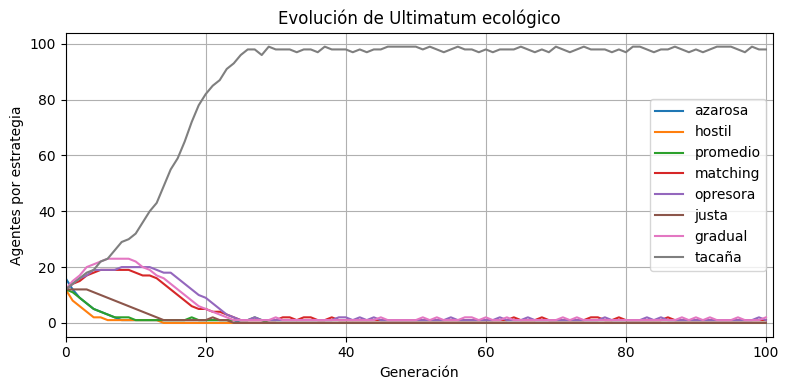

In [40]:
experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa, False)

Para esas poblaciones iniciales, la estrategia tacaña gana la mayoría de veces:

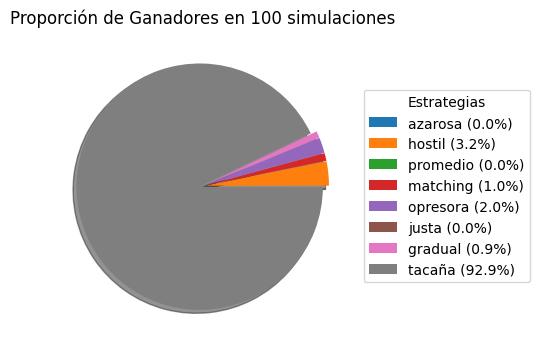

In [6]:
experimentos.graficar_proporcion_ganadores(100, topologia_densa, estrategias)

#### La estrategia tacaña triunfa aproximadamente el 90% de las veces.  

Claramente, su buen rendimiento no se debe a pura casualidad.

Esto genera la primera diferencia con el caso del dilema del prisionero iterado...  

⚠️ completar, yo (mati) desconozco sobre el dilema del prisionero

Ahora castiguemos un poco a la estrategia tacaña dandole una cantidad de agentes inicial menor, y veamos qué sucede:

In [41]:
estrategias_ajustada = {
    "azarosa" : (azarosa[0], azarosa[1], 13),
    "hostil" : (hostil[0], hostil[1], 13),
    "promedio" : (promedio[0], promedio[1], 13),
    "matching" : (matching[0], matching[1], 13),
    "opresora" : (opresora[0], opresora[1], 13),
    "justa" : (justa[0], justa[1], 13),
    "gradual" : (gradual[0], gradual[1], 12),
    "tacaña" : (tacaña[0], gradual[1], 10)
}

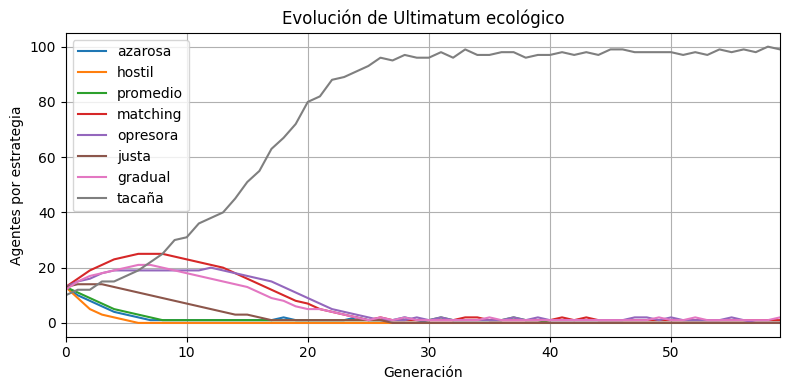

In [43]:
experimentos.graficar_evolucion_poblacional(estrategias_ajustada, topologia_densa)

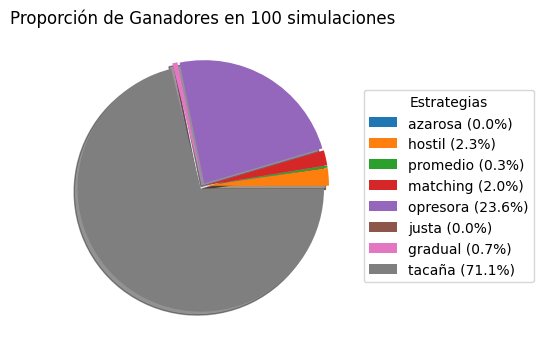

In [12]:
experimentos.graficar_proporcion_ganadores(100, topologia_densa, estrategias)

En este caso, la estrategia tacaña alcanzó su éxito nuevamente, esta vez en el 70% de las simulaciones, habiendo iniciado con el 10% de los agentes totales en vez del ~15% como antes.

### Evolución de estrategias y media de puntos por generación
Si graficamos la media de puntos obtenida por la población general a medida que cambia la población que adopta cada estrategia, podemos observar que, a medida que la estrategia tacaña es adoptada por la mayoría de los agentes, la media de puntos obtenida por la totalidad de la población tiende al máximo.

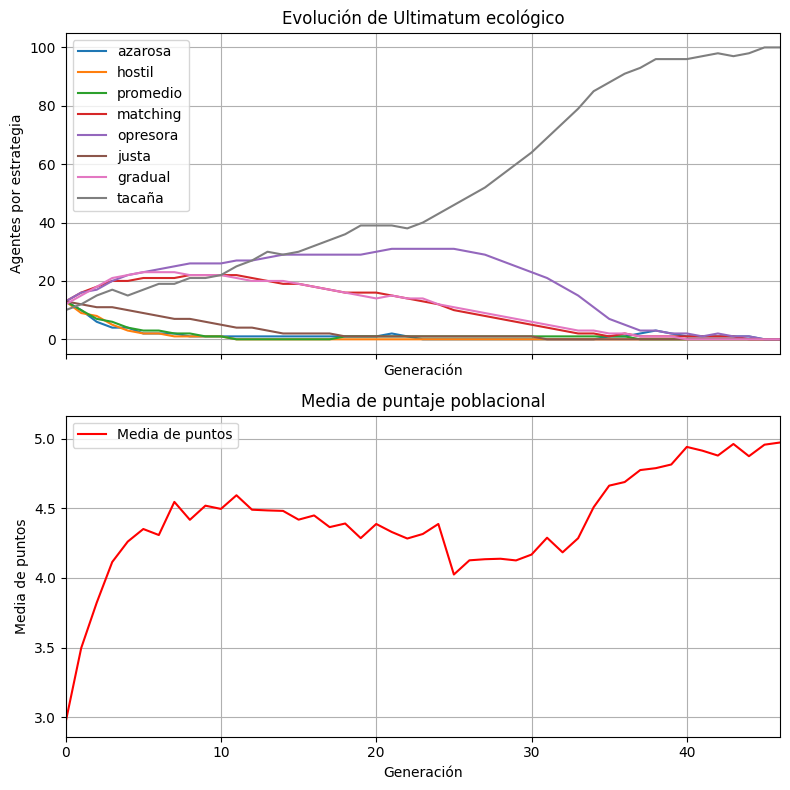

In [66]:
experimentos.n_turnos_por_generacion = 700
experimentos.graficar_evolucion_poblacional(estrategias_ajustada, topologia_densa, True)
experimentos.n_turnos_por_generacion = 100

La población suele ganar más puntos cuando todos implementan la estrategia tacaña, ya que, al ser adoptada por todos los agentes , ninguno rechaza una oferta. Esto lleva a que todas las instancias en que se juegue el *ultimatum game*, las 10 unidades de valor disponibles sean captadas por los agentes.  

Es interesante ver cómo cuando otras estrategias repuntan, aunque sea un poquito, afecta a la media de puntos negativamente. Esto puede verse bien en el grafico de `estrategias_ajustada` donde hay estrategias que les va bien en términos de agentes antes de que la tacaña triunfe.

A diferencia del dilema del prisionero, en que el equilibrio de Nash estable en contextos estáticos lleva a un mínimo en el payoff agregado en la comunidad, en este caso se llega a un óptimo global. 

Esto es una primera idea interesante, que fortaleceremos en las secciones subsiguientes:
- La estrategia tacaña es la más exitosa entre las estrategias de control.
- La estrategia tacaña es robusta (en la sección 3 se profundiza esto). Esto quiere decir que cuando es implementada por la mayoría de los agentes, pasa a ser una estrategia conveniente, lo que lleva a un comportamiento tipo lock-in en que es difícil que otras estrategias la desplacen.
- Cuando triunfa, la estrategia tacaña genera un óptimo social en términos de payoff medio para los agentes.

## 2 - La estrategia tacaña evolucionó mediante un algoritmo genético

En la parte dos, mostramos que un algoritmo genético -> simplemente para contar que la genética es fácil de surgir evolutivamente, y razonamos por qué.

### El algoritmo genético

Los algoritmos genéticos son una forma de **reinforcement learning** inspirados en la evolución biológica.

La unidad de evolución son los *genomas*, tiras de símbolos que codifican un comportamiento.

La evolución sucede por generaciones. En cada generación, se le asigna un genoma al azar, que codifica una estrategia, a cada uno de los $n$ agentes que participan en el juego. 

Al final de la generación, los $k$ genomas más exitosos sobreviven y pasan a la siguiente generación, y los $n - k$ genomas menos exitosos se extinguen. 

Para iniciar la siguiente generación, se completan los $n - k$ genomas faltantes con mutaciones aleatorias de los genomas sobrevivientes.

A través de las generaciones, la selección natural tiende a mejorar el fitness alcanzado por los agentes.

En nuestra implementación, los genomas codifican estrategias mediante redes neuronales. Cada genoma es una tira de símbolos que representa los nodos, las conexiones, y los pesos asociados a la red neuronal. Para ello, seguimos la implementación de Stanley(Stanley, 2002), que permite evolucionar tanto la topología como los pesos y *biases* de la red neuronal mediante algoritmos genéticos.

La representación de las redes neuronales que diseñamos para representar estrategias del *ultimatum game* es la siguiente.

Para **proponer**:

Cuatro neuronas funcionan como input, en el orden siguiente:
1. El valor ofrecido por el agente en el último encuentro.
2. Si en el último encuentro el coparticipante rechazó o aceptó la propuesta.
3. El valor ofrecido por el agente en el anteúltimo encuentro.
4. Si en el anteúltimo encuentro el coparticipante rechazó o aceptó la propuesta.

En caso de que no haya información de encuentros anteriores, los valores se inicializan en cero.

El output está dado por una sola neurona. Si el valor de output es menor a uno, se propone uno. Si el valor de output es mayor a nueve, se propone nueve. De otro modo, se propone el redondeo entero del valor en la neurona de output.

Para **evaluar** propuestas:

Cinco neuronas funcionan como input, en el orden siguiente:
1. El valor ofrecido por el coparticipante en el último encuentro.
2. Si en el último encuentro el agente rechazó o aceptó la propuesta.
3. El valor ofrecido por el coparticipante en el anteúltimo encuentro.
4. Si en el anteúltimo encuentro el agente rechazó o aceptó la propuesta.
5. El valor ofrecido por el coparticipante en el encuentro actual.

El output está dado por una sola neurona. Si el valor de output es menor a cero, la propuesta se rechaza. Si es mayor a cero, se acepta.

El algoritmo genético se inicializa asignando dos redes neuronales de pesos y biases aleatorios sin capas intermedias a cada agente, una para decidir cuánto proponer y otra para decidir cuánto aceptar.

Luego, el sistema evoluciona mediante generaciones, cada una de las cuales funciona del siguiente modo:

1. Se reparten los genomas al azar entre $n$ agentes. Los genomas codifican redes neuronales que definen estrategias.
2. Se juegan $k$ turnos del *ultimatum game* entre pares de vecinos en el grafo, elegidos con probabilidad uniforme.
3. Se calculan el *payoff* medio de cada agente, que es el *payoff* total obtenido sobre la cantidad de negociaciones en que participó.
4. Se toman los genomas sobrevivientes, que son los genomas de los $s$ agentes de mejor rendimiento en la generación anterior. El resto de los genomas se elimina.
5. Se crean $m = n - s$ genomas nuevos para completar la población. Los nuevos genomas se obtienen a partir de las siguientes mutaciones:
    1. Modificar los pesos y *biases* de algún genoma sobreviviente aleatoriamente.
    2. Añadir un nuevo nodo a algún genoma sobreviviente.
    3. Añadir una nueva conexión a algún genoma sobreviviente.
    4. "Cruzar" dos genomas sobrevivientes, tomando partes de la estructura de uno y partes de la estructura de otro.

Las mutaciones implementadas siguen la caracterización de Stanley.

A continuación, podemos observar el resultado de una ejecución de la evolución genética de estrategias en un contexto de 70 agentes, con 20 sobrevivientes por generación, 30 genomas obtenidos por mutar pesos, 10 genomas obtenidos por cruces, 5 genomas obtenidos de añadir un nuevo nodo y 5 genomas obtenidos de añadir una nueva conexión.

In [12]:
from evolucionar_estrategia_genetica import *

genoma_estrategia_evolucionada, otros_genomas_sobrevivientes = evolucionar_estrategia_genetica()

Generaciones: [########################################] 100.00%


Podemos saber si el genoma de mayor fitness en la última generación implementa la estrategia tacaña, o en su defecto, si  algún genoma sobreviviente en la última generación implementa la estrategia tacaña, analizando qué respondería cada agente ante cada input posible. Si siempre propone 1 y siempre acepta, el genoma implementa la estrategia tacaña.


In [13]:
print(implementa_estrategia_tacaña(genoma_estrategia_evolucionada))
print(alguno_implementa_estrategia_tacaña(otros_genomas_sobrevivientes))

True
(True, (<genome.Genome object at 0x743922999210>, <genome.Genome object at 0x7439225d6610>))


Observamos que la estrategia tacaña evolucionó mediante el algoritmo genético. Esto sucedió en diversos intentos, con ...

en que los agentes evolucionan sus propias estrategias convergió en todos nuestros experimentos a la estrategia óptima de Nash. Algunas explicaciones de esto es que es una estrategia greedy, depredadora, funciona bien en varios contextos, es de máxima simplicidad en términos de Kolmogorov, y el equilibrio en el cual todos la usan es un óptimo social.

Nuestros experimentos desde el enfoque genético genera sistemáticamente la estrategia tacaña. El resultado es plausible por algunas virtudes de la estrategia tacaña en oposición a otras estrategias.

- Es **consistente**, en el sentido de que además de ser una estrategia óptima robusta en diversos contextos poblacionales, es un equilibrio de nash estable de subjuegos perfectos en el juego del ultimatum de una sola ronda. Esto puede interpretarse como que es "greedy", en el sentido de que es fácil de llegar a ella siguiendo óptimos locales.
- Es **simple**, en el sentido de que tiene una complejidad de Kolmogorov menor que la de la estrategia recíproca. -> La mínima complejidad de Kolmogorov posible (ambas son constantes).
- Es **socialmente óptima**, en el sentido de que a diferencia del equilibrio de nash estable para el dilema del prisionero iterado, que genera situaciones subóptimas para la población que la ejecute, la estrategia tacaña también alcanza el óptimo social (esto no le gana a la estrategia recíproca, pero la iguala, usando consistencia y simplicidad). -> tiende a ser socialmente óptima a medida que más agentes la adoptan.
- Además, es **robusta**, algo que observaremos en las secciones 3 ¿y 5?, lo que implica que una vez que toda la población la implementa, la masa crítica necesaria para que aparezca una estrategia más exitosa es menor.

Queda la pregunta de por qué aparece algo no tacaño

## 3 - Implementaciones *ad-hoc* de una estrategia anti-tacaña

En esta sección exploramos implementaciones *ad-hoc* destinadas a contrarrestar la estrategia tacaña en diferentes contextos. Concluimos que existen situaciones donde la táctica conservadora puede no ser la más efectiva, destacando la importancia de adaptar las estrategias según el entorno y las circunstancias. Además, observamos que la estrategia tacaña demuestra una notable robustez al resistir a la mayoría de los desafíos.

### Diseño de estrategia antitacaña

Diseñamos una estrategia antitacaña *ad-hoc* para desplazar o extinguir a la estrategia tacaña. Por un lado, esto permite ilustrar contextos poblacionales posibles en que la estrategia tacaña no es conveniente.  

El diseño propuesto para la nueva estrategia, la antitacaña, es el siguiente:
- Ofrece 1 si y solo si el otro agente le ofreció menos de 3 en el pasado. Caso contrario, ofrece 3.
- Acepta una oferta si, y sólo si, es mayor a 3.



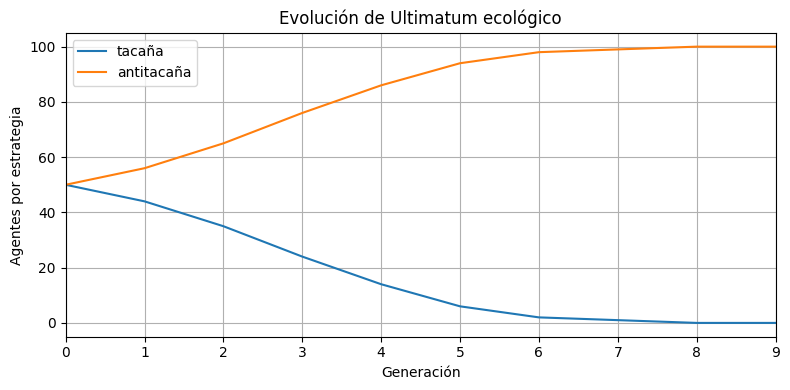

In [15]:
estrategias = {
    "tacaña" : (tacaña[0], tacaña[1], 50),
    "antitacaña" : (antitacaña[0], antitacaña[1], 50)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)


Como veremos en las siguientes simulaciones, la estrategia antitacaña gana el 100% de las veces contra la tacaña, extinguiéndola en unas pocas generaciones.  

⚠️ Posible idea:  
> - obtener generacion en la que triunfa (alcanza cerca del 100% de agentes) y/o se extingue (alcanza el 0%), y ver qué onda la distribucion. Un boxplot podría ser buena idea.  
> como puede ser que SIEMPRE gane en la generación 8?   
> - si hacemos MUCHAS simulaciones, se acercará a una Normal la distribucion de la geneneracion en que triunfa la antitacaña? podriamos verlo con un QQ-plot

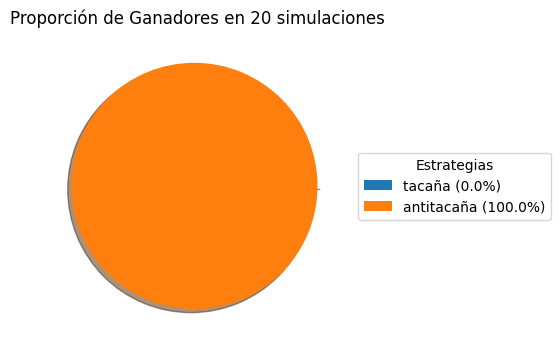

In [69]:
experimentos.graficar_proporcion_ganadores(20, topologia_densa, estrategias)

La implementación *ad-hoc* de una estrategia antitacaña muestra que existen contextos de poblaciones de estrategias en que no es conveniente para los agentes implementar la estrategia tacaña.

Sin embargo, la mera existencia de estrategias antitacañas en el ecosistema no implica necesariamente un desplazamiento de las estrategias tacañas. Por ejemplo, cuando hay 15 estrategias antitacañas y 85 estrategias tacañas, ganan sistemáticamente las estrategias tacañas.

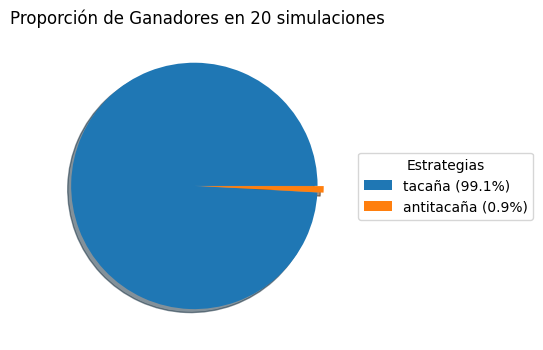

In [6]:
estrategias = {
    "tacaña" : (tacaña[0], tacaña[1], 85),
    "antitacaña" : (antitacaña[0], antitacaña[1], 15)
}

experimentos.graficar_proporcion_ganadores(20, topologia_densa, estrategias)


Intentemos averiguar para qué proporciones de estrategias deja de ganar la antitacaña y empieza a ganar la estrategia tacaña.

In [9]:
experimentos.criticalidad_ganador_dos_estrategias(antitacaña, tacaña, topologia_densa, 20, 15, 50, 1)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c7da3f7fcd0>>
Traceback (most recent call last):
  File "/home/neville/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7c7da3f7fcd0>>
Traceback (most recent call last):
  File "/home/neville/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Vemos que hay un cambio de fase abrupto cuando la proporción de estrategias antitacañas supera el 30%, logrando con esta presencia su éxito. Esto pone en evidencia la robustez de la estrategia tacaña.

Para interpretar este resultado, observemos que no existe una estrategia o combinación de estrategias mejor que la diseñada para desplazar a la estrategia tacaña.

⚠️   comentario acá:  
> quiza sea un poco fuerte afirmar que no existe estrategia antitacaña mejor que la hecha, teniendo en cuenta que lo estamos demostrando en castellano y no es algo tan formal. quiza quedaría mejor afirmar que debido a todo esto se considera una gran estrategia opositora a la tacaña, como una "explicación" de por qué es buena, y no tanto como una prueba absoluta

Supongamos que tenemos un conjunto de agentes implementando la estrategia tacaña $T$ y otro conjunto de agentes implementando una estrategia o combinación de estratetias antitacaña $A$. 

En cada turno del juego, pueden suceder cuatro cosas:

1. Un tacaño sea oferente y un tacaño sea receptor. En ese caso, el *payoff* medio obtenido por los tacaños será de 5 puntos, el máximo posible. Ninguna estrategia antitacaña puede interferir la dinámica entre dos tacaños.

2. Un antitacaño sea oferente y algún antitacaño sea receptor. En este caso, el máximo *payoff* medio posible para los participantes del juego es de 5 puntos. En la estrategia antitacaña que diseñamos, dos antitacaños que se encuentran también tienen un payoff medio de 5 puntos, el máximo posible. Ninguna población antitacaña puede obtener un *payoff* medio mayor al encontrarse entre sí.

3. Un tacaño sea oferente y un antitacaño sea receptor. Los tacaños siempre ofrecen 1. Para que la población antitacaña crezca y la población tacaña disminuya entre las generaciones, el puntaje medio de los agentes antitacaños debe ser mayor que el puntaje medio de los agentes tacaños. Aceptar la propuesta ayudaría más al puntaje medio de los agentes tacaños que al de los antitacaños, por lo que rechazarla es mejor para desplazar a los tacaños que aceptarla.

4. Un antitacaño sea oferente y algún tacaño sea receptor. En ese caso, la estrategia que diseñamos ofrece siempre 1, y este valor siempre es aceptado por los tacaños. Que la población antitacaña gane 9 y la población tacaña gane 1 en todos estos encuentros genera la máxima diferencia posible entre antitacaños y tacaños en este tipo de juegos.

Por lo tanto, no existe una estrategia o combinación de estrategias mejor que la que diseñamos para desplazar a la estrategia tacaña. 

Esto implica que la estrategia tacaña gana sistemáticamente siempre que la utilice más del 70% de la población. En otras palabras, se requiere una población de al menos 30% de estrategias no tacañas para que exista la posibilidad de que una estrategia tenga *payoffs* mejores que los de la estrategia tacaña, lo cual genera un efecto *lock-in* una vez que la población implementa estrategias tacañas.


El hecho de que las estrategias antitacañas, al igual que las estrategias tacañas, obtengan una media de 5 puntos al negociar entre ellas, produce una dinámica interesante.

Al graficar la media de puntos obtenidos por la población total de agentes según la proporción de estrategias tacañas y antitacañas, obtenemos una parábola.

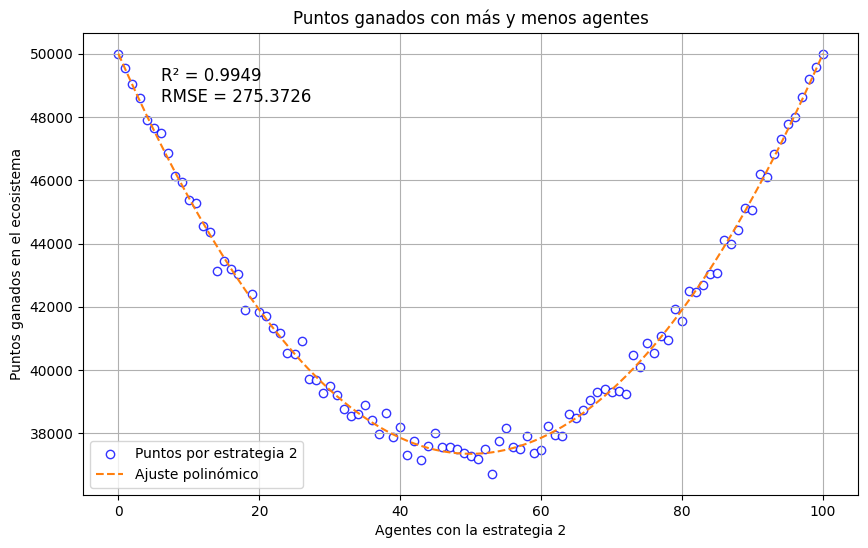

In [5]:
experimentos.puntos_segun_presencia_de_dos_estrategias(tacaña, antitacaña, topologia_densa, True)

Claramente, la correlación observada entre cantidad de agentes (entre dos estrategias) y el puntaje global es muy alto, alcanzando los máximos puntajes cuando la estrategia tacaña se acerca a 0 agentes (o sea, la antitacaña arranca con 100) y cuando se acerca a 100 (la estrategia antitacaña arranca con 0). Desarrollar un poco mas esto ... ⚠️ 

Esto mismo no ocurre si enfrentamos otras estrategias incluyendo una menos óptima:

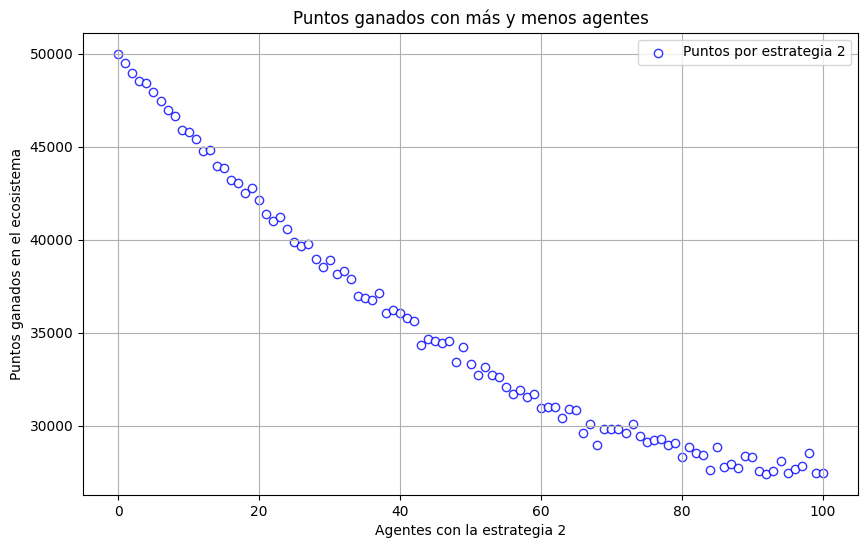

In [7]:
experimentos.puntos_segun_presencia_de_dos_estrategias(tacaña, azarosa, topologia_densa)

Esto muestra que, al menos en este caso, tomar la estrategia mayoritaria no sólo es óptimo para los individuos que participan, sino que también contribuye al óptimo social.

Es interesante que el mínimo de puntos a nivel social se da cuando la mitad de la población usa cada estrategia, pero el cambio de fase a partir del cual la estrategia antitacaña emerge como victoriosa se da cuando el 30% de los agentes implementan la estrategia antitacaña.

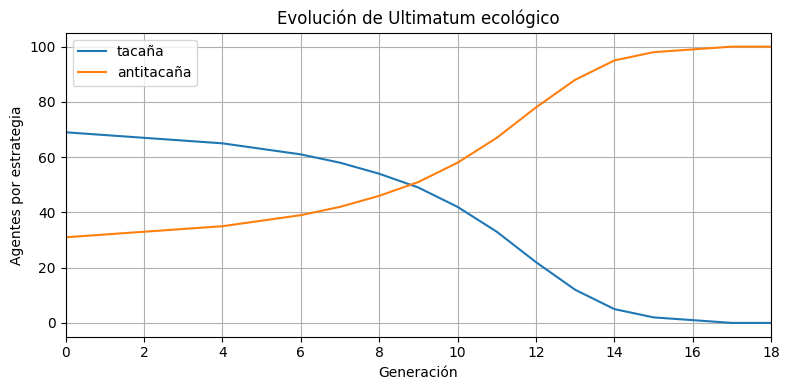

In [16]:
estrategias = {
    "tacaña" : (tacaña[0], tacaña[1], 69),
    "antitacaña" : (antitacaña[0], antitacaña[1], 31)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

### 4 - La reciprocidad genera una cuenca robusta

La reciprocidad de Axelrod. También llamada *tit for tat* en inglés.

Funciona del siguiente modo... completar ⚠️ 

Promueve la cooperación en contextos de dilema del prisionero iterado. Fue propuesta por Axelrod y Hamilton e impactó en ... Se considera que las emociones de la gratitud y el enfado suelen heurísticas cognitivas que promueven la cooperación en contextos de dilema del prisionero iterado.

(Bloom, 2008)

Se argumentó que parte de las heurísticas que nos llevan a tomar decisiones... completar ⚠️ 

### Objetivos y estructura

Analizamos contextos plausibles que la vuelven subóptima y podrían explicar el funcionamiento práctico de los individuos. En particular, mostramos que si existe una heurística que lleve a la mayoría de las personas a comportarse en el ultimatum game mediante la reciprocidad, entonces la reciprocidad se vuelve más conveniente que la estrategia tacaña, e implementarla se vuelve un equilibrio estable.

Lo interesante es que muchos agentes que juegan ultimatum game reportan fastidio y/o enfado, lo cual sugiere que implementan esa heurística cognitiva. El argumento evolutivo para ese caso 


- Ver si la reciprocidad emerge en el contexto "de juguete" que vimos antes. Tanto sin la estrategia tacaña como con la estrategia tacaña.

Sin embargo, si comparamos la reciprocidad con la estrategia tacaña en el contexto inicial

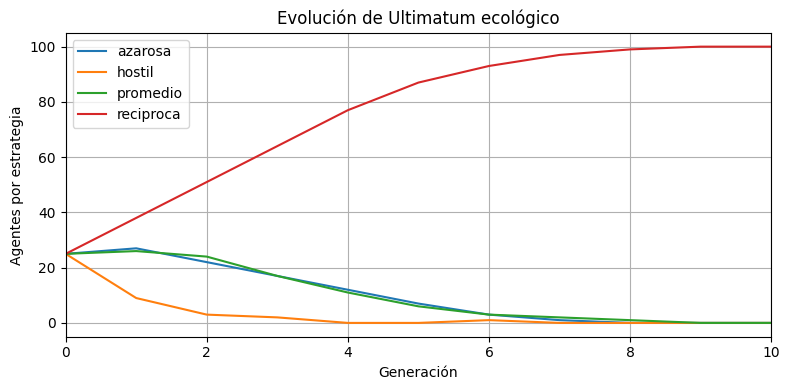

In [17]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 25),
    "hostil" : (hostil[0], hostil[1], 25),
    "promedio" : (promedio[0], promedio[1], 25),
    "reciproca" : (reciproca[0], reciproca[1], 25)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

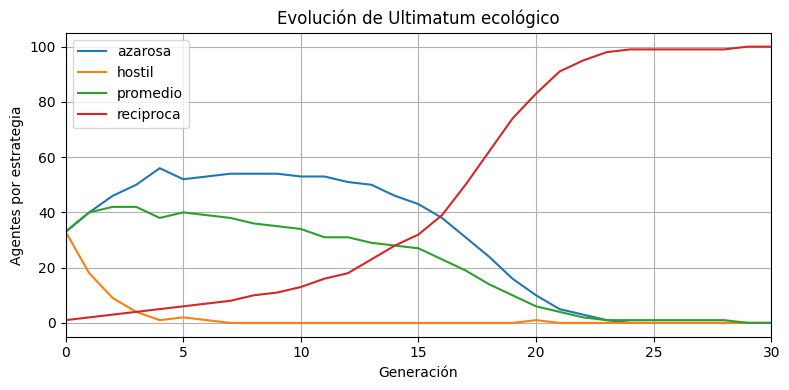

In [21]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 33),
    "hostil" : (hostil[0], hostil[1], 33),
    "promedio" : (promedio[0], promedio[1], 33),
    "reciproca" : (reciproca[0], reciproca[1], 1)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

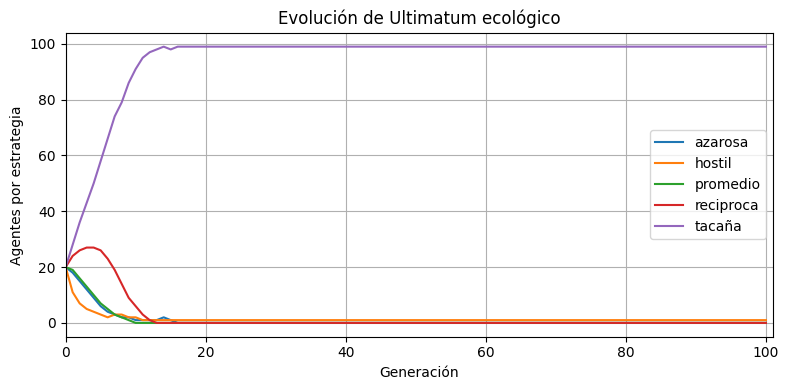

In [19]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 20),
    "hostil" : (hostil[0], hostil[1], 20),
    "promedio" : (promedio[0], promedio[1], 20),
    "reciproca" : (reciproca[0], reciproca[1], 20),
    "tacaña" : (tacaña[0], tacaña[1], 20)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

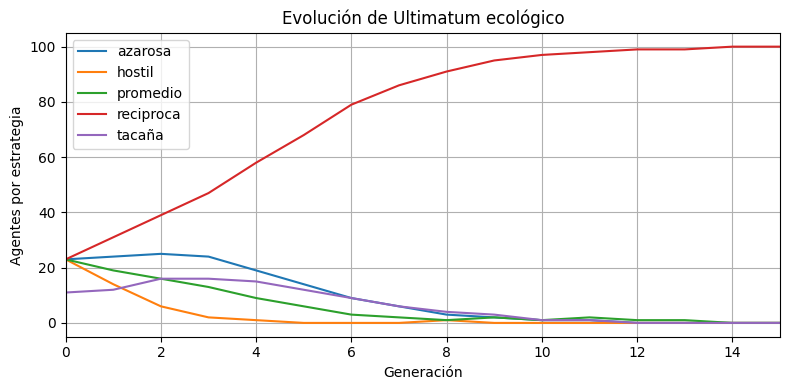

In [23]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 23),
    "hostil" : (hostil[0], hostil[1], 23),
    "promedio" : (promedio[0], promedio[1], 23),
    "reciproca" : (reciproca[0], reciproca[1], 23),
    "tacaña" : (tacaña[0], tacaña[1], 11)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

Descubrí una cosa interesante.

Comparar la reciprocidad en el contexto que 


Supuestamente evolucionamos las emocinoes de reciprocidad (enfado y gratitud) para resolver situaciones tipo dilema del prisionero iterado. Los supuestos del dilema del prisionero iterado acá no aplican.

Sin embargo, en contextos donde la mayoría de la gente se enoja (osea implementa la reciprocidad, aunque no escale como sí escala en el dilema del prisionero iterado), es conveniente usar la reciprocidad

Después de mostrarlo...

- Ver que las ofertas medias en este contexto son del 50%, la oferta promedio es del 40%? y los participantes frecuentemente rechazan ofertas menores al 50%?

Concuerda con la hipótesis planteada por Axelrod, que es que la simplicidad de las estrategias genera bienestar.

Esto sugiere algo curioso, que es que nuestro comportamiento intuitivo en el ultimatum game 


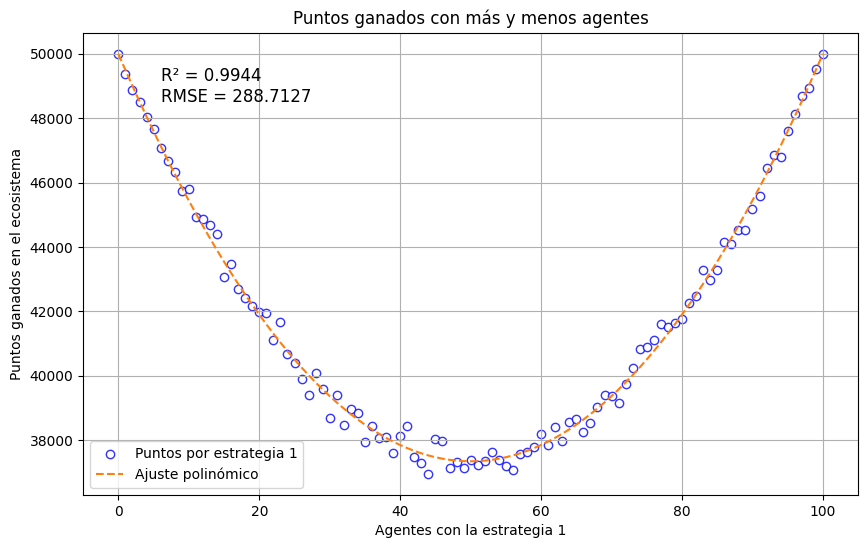

In [23]:
experimentos.puntos_segun_presencia_de_dos_estrategias(estrategias['tacaña'], estrategias['reciproca'], topologia_densa, True)

Observamos que, por ejemplo, tres cuartos de los agentes implementan la reciprocidad y el resto la tacaña, se aproximan los valores observados experimentalmente.

In [25]:

estrategias = {
    "reciproca" : (reciproca[0], reciproca[1], 75),
    "tacaña" : (tacaña[0], tacaña[1], 25)
}
oferta_mediana, oferta_media, porcentaje_de_ofertas_menores_a_5_rechazadas = experimentos.obtener_variables_macroscopicas(estrategias, topologia_densa)

print(f"La oferta mediana fue {oferta_mediana}")
print(f"La oferta media fue de {oferta_media}")
print(f"El porcentaje de ofertas menores a 5 que fue rechazada fue del {round(porcentaje_de_ofertas_menores_a_5_rechazadas)}%")

La oferta mediana fue 5.0
La oferta media fue de 3.8857142857142857
El porcentaje de ofertas menores a 5 que fue rechazada fue del 77%


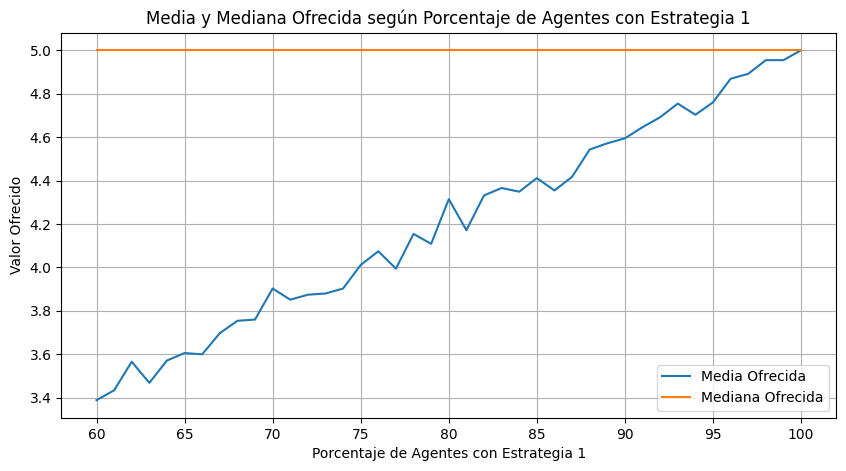

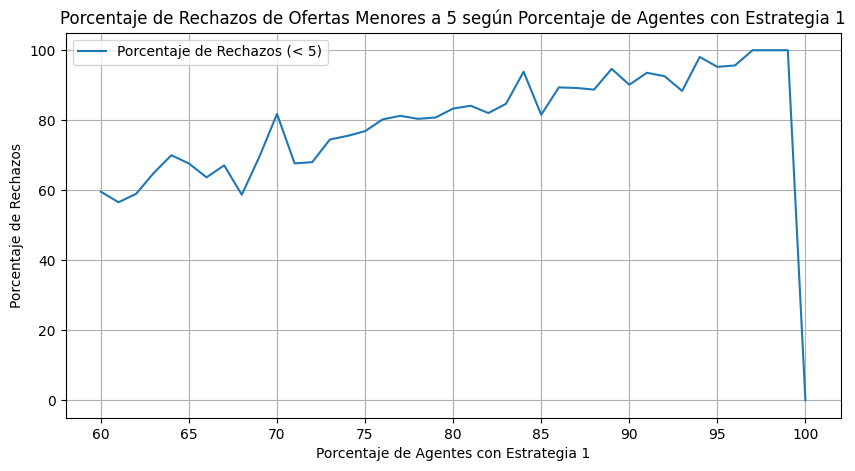

In [26]:
experimentos.obtener_variables_macroscopicas_rango((reciproca[0], reciproca[1]), (tacaña[0], tacaña[1]), topologia_densa, 60, 100, 1)

En la parte cuatro, formulamos nuestra hipótesis fuerte -> lo que está pasando es la reciprocidad. 
1. El enfoque conductual y evolutivo muestra que es plausible que implementemos una heurística de reciprocidad. 
2. Vemos experimentalmente que la reciprocidad le gana a la estrategia tacaña cuando es mayoritaria, lo que permite la preservación del "default" heurístico.
3. Vemos experimentalmente que la presencia de la reciprocidad con ciertos parámetros genera, como fenómeno emergente, las variables macroscópicas que observamos 


- Los antirratas ganan desde que son 30.
- Los recíprocos ganan desde que son la mitad.
- En términos de bienestar poblacional, ambas propuestas son óptimas y mutuamente robustas (tienen una cuenca).
- La reciprocidad puede tener una asociación emocional (Axelrod y Hamilton) -> Si hay gente implementando reciprocidad, aunque no sea tan robusta como la reciprocidad en Axelrod (que gana incluso siendo muy poquitos) sigue siendo más o menos robusta.


- Probar con reciprocidades más "chicas" (que ofrezcan, por ejemplo, 6)




En el enfoque genético, evolucionó la estrategia tacaña. Esto es porque es una estrategia bastante robusta y muy simple (no depende del historial).

## 5 - Esto quizás es mejor para el apéndice. Otros resultados - investigaciones preliminares

- Qué estrategias le ganan a la reciprocidad?
- Qué estrategias le ganan a la estrategia antitacaña?
- Qué estrategias le ganan a la estrategia tacaña?
- Qué estrategias triunfan en un contexto ecológico particular?
- Qué estrategias evolucionan para un mismo receptor y oferente (distintas)? Y cuando todos los agentes que están en una estrella tienen la misma estrategia? Y si pudieran incorporar social norms entre sí? -> añadir una segunda neurona que puede quitarle dinero ganado al que acaba de aceptar una oferta a partir de la oferta que aceptó, perdiendo dinero ella misma y también la otra.

- Mostrar que la estrategia tacaña es robusta (las estrategias que evolucionan contra ella la tienden a imitar? o que nadie puede evolucionar para ganarle siendo poquitos, siendo 3 aprox o algo así)

## Límites y próximos pasos

Las estrategias con las que participó la tacaña en la primera sección eran medio boludas. Estaría bueno probarlo con otras. Además, a veces ganaron otras estrategias, sería bueno ver qué pasó ahí.

En el enfoque genético la estrategia tacaña ... Las estrategias participaron con estrategias mutadas, sería bueno cómo se comportan al interactuar sólo con otros sobrevivientes. También sería bueno ver ...

Usar el algoritmo genético para evolucionar estrategias exitosas adaptadas a una población determinada.

Usar el algoritmo genético para evaluar si la estrategia que emerge en contextos de dilema del prisionero iterado es la reciprocidad (pueden hacer falta algunas modificaciones).

Hemos analizado un conjunto limitado de estrategias en el enfoque ecológico. Sería bueno ver:
    - Relación con la topología (no consideran cantidades de vecinos de uno y el otro, podría ser interesante observar eso). Es algo que podríamos implementar fácilmente.
    - Nuevas estrategias, yo quiero ver si hay situaciones de no transitividad, (A le gana a B, B le gana a C, C le gana a A).
    - Jugar el algoritmo ecológico con estrategias distintas.



## Referencias

- Schuster, 2017, Nature.
- Brosnan, 2009, Neuroeconomics.
- Bloom, 2008, Introduction to Psychology With Paul Bloom, Yale Open Courses, Evolution, Emotion and Reason, minuto 25:20 (https://youtu.be/i5IrSEIPdwk?si=WBHpx7UftK5jRSnt&t=1521).
- Axelrod, 1983, The Evolution of Cooperation
- Stanley, 2002


- Heilman, 2016, Emotion Regulation and Economic Decision-Making (Neuroeconomics)
- Kahneman, D., & Tversky, A. (1974). Judgment under Uncertainty: Heuristics and Biases. Science, 185(4157), 1124-1131. 
- Sanfey, A. G., Rilling, J. K., Aronson, J. A., Nystrom, L. E., & Cohen, J. D. (2003). The neural basis of economic decision-making in the Ultimatum Game. Science, 300(5626), 1755-1758. doi:10.1126/science.1082976
- van’t Wout, M., Kahn, R. S., Sanfey, A. G., & Aleman, A. (2006). Affective state and decision-making in the Ultimatum Game. Experimental Brain Research, 169(4), 564-568. doi:10.1007/s00221-006-0346-5